In [1]:
# basic data presentation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# label encoder
from sklearn.preprocessing import LabelEncoder

# train-test-split & hyperparameter tuning parameters
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

# models (ML Algo)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# warnings 
import warnings 
warnings.filterwarnings('ignore')

### Read the DataSet

In [2]:
df_lp = pd.read_csv("Indian Liver Patient Dataset.csv")
df_lp.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# shape of the data
df_lp.shape

(583, 11)

In [4]:
# information about the data set
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       583 non-null    int64  
 1   Gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   Alkphos   583 non-null    int64  
 5   Sgpt      583 non-null    int64  
 6   Sgot      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   A/G       579 non-null    float64
 10  Selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


**There is total 11 features(columns) in the data set.**

In [5]:
# checking total null values
df_lp.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         4
Selector    0
dtype: int64

**A/G** columns having 4 null values, let's see how can we fix it.

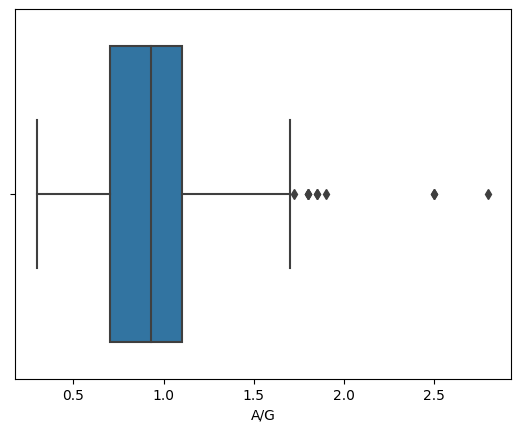

In [6]:
# check the distribution of A/G
sns.boxplot(df_lp['A/G'])
plt.show()

**A/G** columns contain some outliers so, we can replace the missing values with the median.

In [7]:
# replaceing the missing values with median
df_lp['A/G'] = df_lp['A/G'].replace(to_replace = np.NaN, value = df_lp['A/G'].median())
df_lp.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         0
Selector    0
dtype: int64